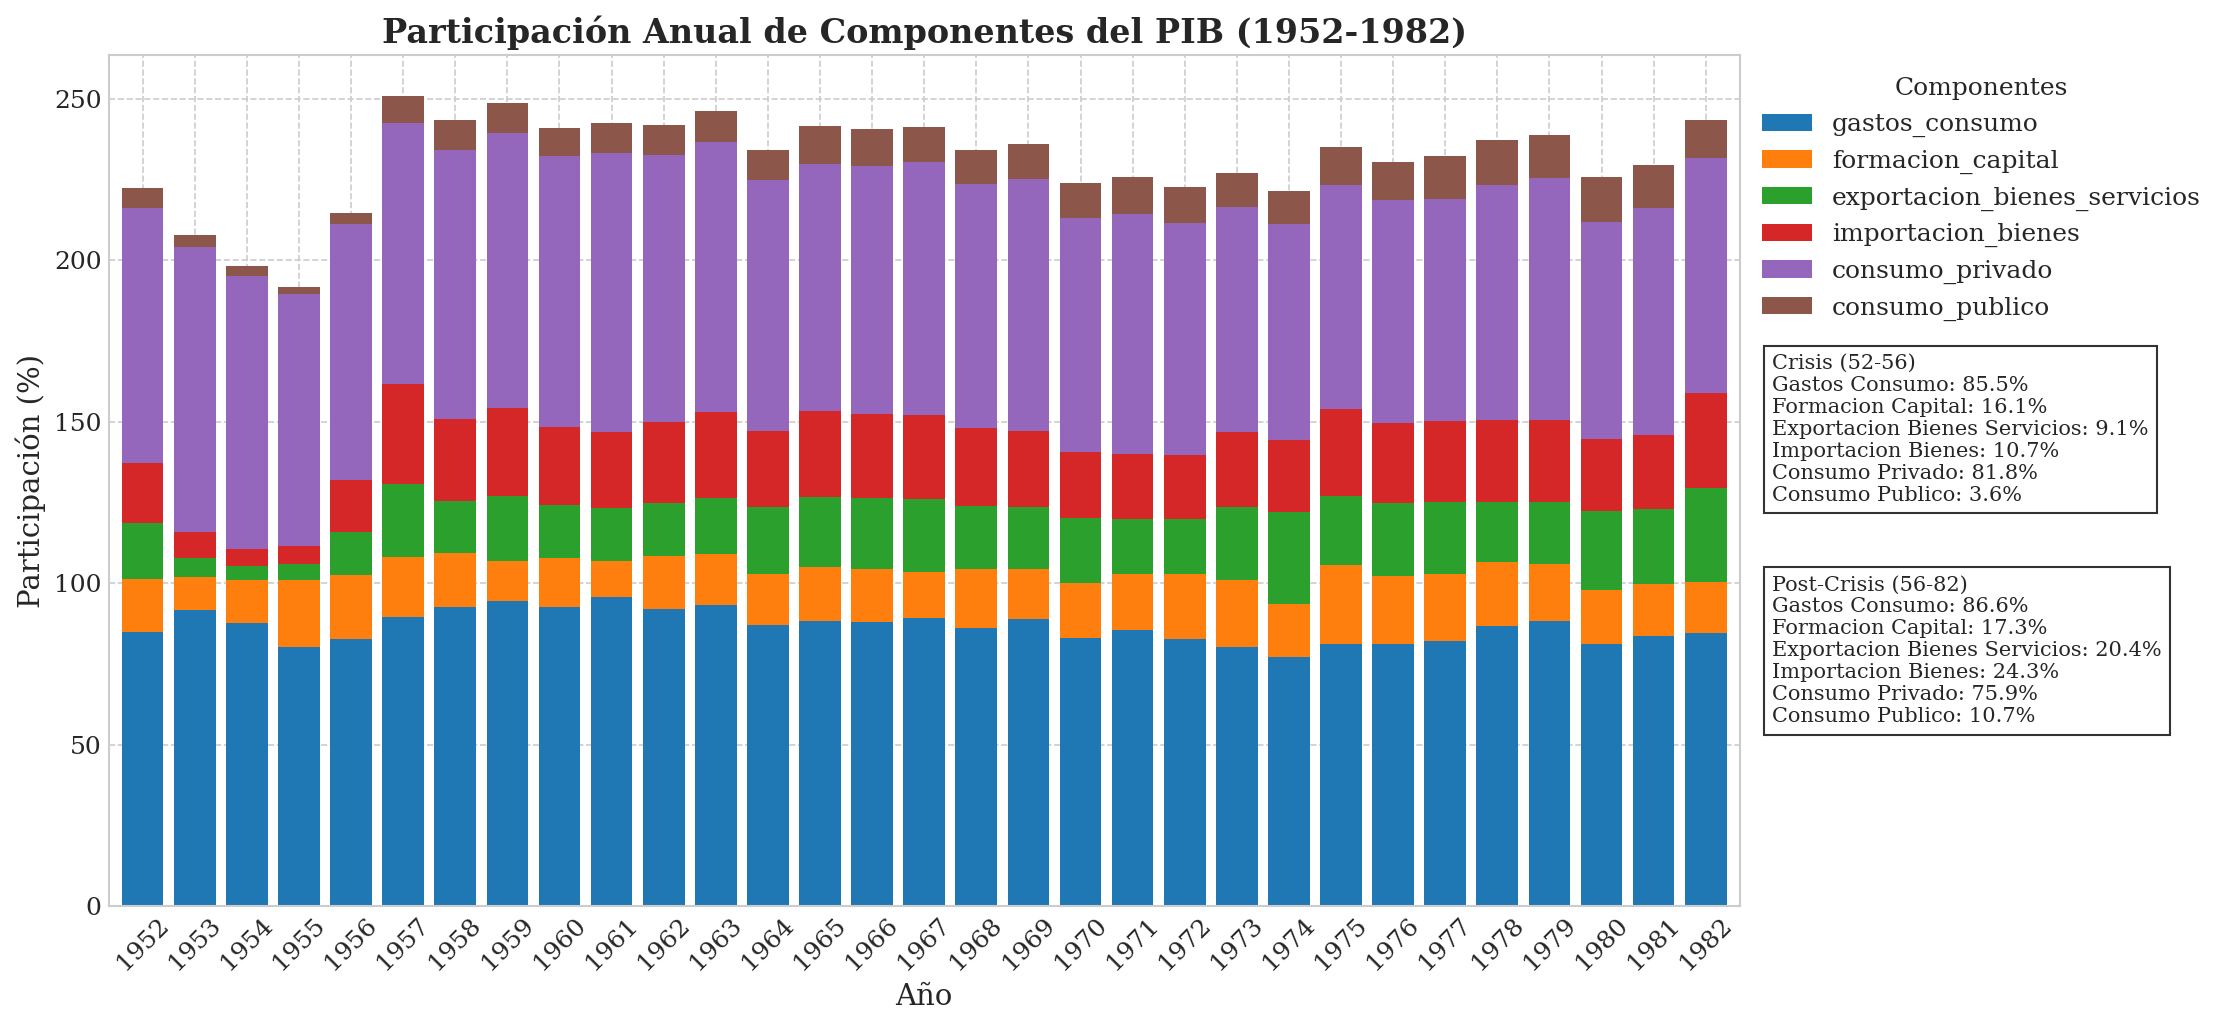

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import os

# ------------------------------------------------------------------------------
# 1.  DIRECTORIOS
# ------------------------------------------------------------------------------
base_path    = "../../../assets/tesis/neoliberalismo/serie_completa"
dir_completa = os.path.join(base_path, "componentes_pib")
os.makedirs(dir_completa, exist_ok=True)

# ------------------------------------------------------------------------------
# 2.  ESTILO GRÁFICO PROFESIONAL
# ------------------------------------------------------------------------------
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'font.family'    : 'serif',
    'font.size'      : 12,
    'axes.titlesize' : 16,
    'axes.labelsize' : 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'grid.linestyle' : '--',
    'lines.linewidth': 2,
    'figure.dpi'     : 150,
    'savefig.bbox'   : 'tight'
})

# ── 1. Parámetros y rutas ─────────────────────────────────────────────────────
CRISIS_YEARS = slice(1952, 1956)   # 1952‑1955 inclusive
POST_YEARS   = slice(1956, 1982)   # 1956‑1982 inclusive
OUTPUT_DIR   = "../../../assets/tesis/intervensionismo_estatal/serie_completa/componentes_pib"
os.makedirs(OUTPUT_DIR, exist_ok=True)



# ── 3. Carga de datos ──────────────────────────────────────────────────────────
with sqlite3.connect("../../../db/proyectomacro.db") as conn:
    df_pib = pd.read_sql_query("SELECT * FROM PIB_Real_Gasto", conn, index_col="año")

df = df_pib.loc[1952:1982].copy()

# ── 4. Preparar participaciones (%) ───────────────────────────────────────────
componentes = [
    'gastos_consumo',
    'formacion_capital',
    'exportacion_bienes_servicios',
    'importacion_bienes',
    'consumo_privado',
    'consumo_publico'
]
pct = df[componentes].div(df["pib_real_base_1990"], axis=0) * 100

# ── 5. Estadísticas promedio por periodo ──────────────────────────────────────
avg_crisis = pct.loc[CRISIS_YEARS].mean()
avg_post   = pct.loc[POST_YEARS].mean()

# ── 6. Gráfico stacked‑bar por año ────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(15, 7))
pct.plot(kind="bar", stacked=True, ax=ax, width=0.8)

ax.set_ylabel("Participación (%)")
ax.set_xlabel("Año")
ax.set_title("Participación Anual de Componentes del PIB (1952‑1982)", fontweight="bold")
ax.legend(loc="upper left", bbox_to_anchor=(1,1), title="Componentes")
plt.xticks(rotation=45)

# ── 7. Cuadros con promedios de crisis y post‑crisis ──────────────────────────
stats_crisis = "\n".join(
    f"{comp.replace('_',' ').title()}: {avg_crisis[comp]:.1f}%"
    for comp in componentes
)
stats_post = "\n".join(
    f"{comp.replace('_',' ').title()}: {avg_post[comp]:.1f}%"
    for comp in componentes
)

# Crisis box (82‑86)
ax.text(1.02, 0.56, "Crisis (52‑56)\n" + stats_crisis,
        transform=ax.transAxes, fontsize=10, va="center", ha="left",
        bbox=dict(facecolor="white", alpha=0.8, edgecolor="black"))

# Post‑crisis box (86‑02)
ax.text(1.02, 0.30, "Post‑Crisis (56‑82)\n" + stats_post,
        transform=ax.transAxes, fontsize=10, va="center", ha="left",
        bbox=dict(facecolor="white", alpha=0.8, edgecolor="black"))

# ── 8. Guardar y mostrar ─────────────────────────────────────────────────────
plt.tight_layout()

plt.savefig(os.path.join(OUTPUT_DIR, "componentes_pib.png"), dpi=300)
plt.show()



In [3]:
pct[]

,gastos_consumo,formacion_capital,exportacion_bienes_servicios,importacion_bienes,consumo_privado,consumo_publico
año,,,,,,
1952,85.009305,16.387334,17.225331,18.621971,79.050275,5.959031
1953,91.840397,10.214413,5.866588,7.921380,88.237050,3.603329
1954,87.559012,13.369886,4.355116,5.283997,84.680982,2.878031
1955,80.166363,20.848892,4.807747,5.823019,78.004838,2.161525
1956,82.753907,19.871618,13.358333,15.983841,79.122188,3.631701
1957,89.397216,18.867412,22.519938,30.784566,81.017696,8.379502
1958,92.621241,16.810475,15.977390,25.409106,83.397792,9.223449
1959,94.432940,12.351112,20.352155,27.136207,85.059561,9.373379
1960,92.554877,15.274949,16.429055,24.258881,83.797245,8.757632
